In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
import os
os.listdir()

['S2A_MSIL2A_20180704T085021_N0208_R107_T35TQF_20180704T151449.zip',
 'subset_0_of_S2B_MSIL2A_20200628T084559_N0214_R107_T35TQF_20200628T114603_resampled_B3.tif',
 'subset_1_of_S2A_MSIL2A_20180704T085021_N0208_R107_T35TQF_20180704T151449_resampled_B4.tif',
 'subset_1_of_S2A_MSIL2A_20180704T085021_N0208_R107_T35TQF_20180704T151449_resampled_B8.tif',
 'subset_2_of_S2B_MSIL2A_20200628T084559_N0214_R107_T35TQF_20200628T114603_resampled_B4.tif',
 'subset_2_of_S2B_MSIL2A_20200628T084559_N0214_R107_T35TQF_20200628T114603_resampled_B8.tif']

In [5]:
#import bands as separate 1 band raster
band4 = rasterio.open('subset_2_of_S2B_MSIL2A_20200628T084559_N0214_R107_T35TQF_20200628T114603_resampled_B4.tif') #red
band8 = rasterio.open('subset_2_of_S2B_MSIL2A_20200628T084559_N0214_R107_T35TQF_20200628T114603_resampled_B8.tif') #nir

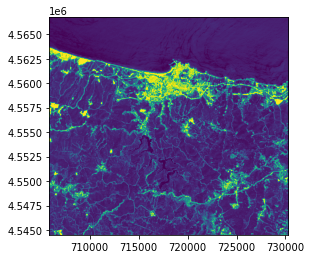

C:\Users\PC\anaconda3\envs\GEO468\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


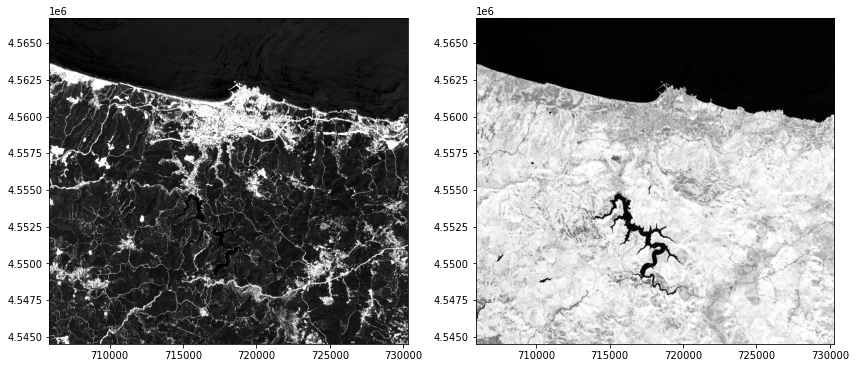

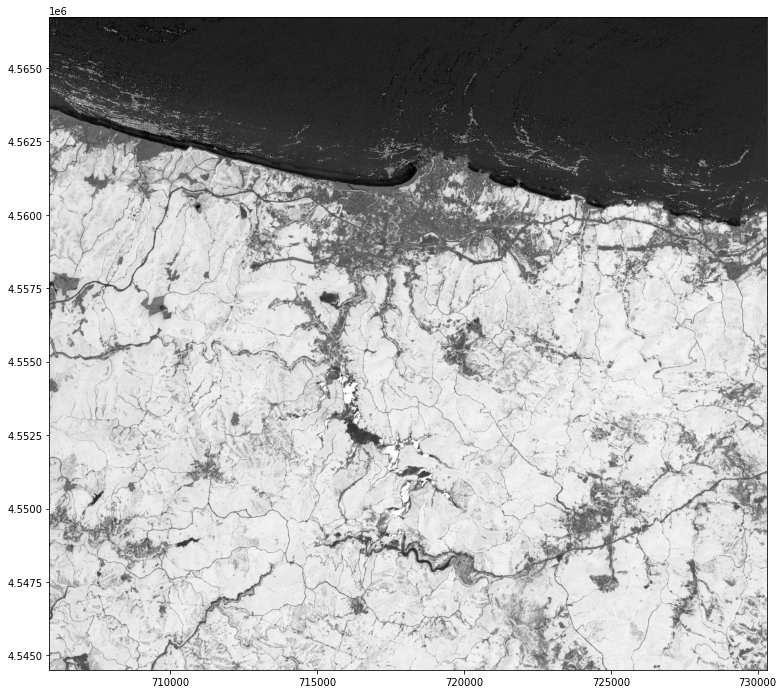

<AxesSubplot:>

In [37]:
#number of raster rows
band4.height
#number of raster columns
band4.width
#plot band 
plot.show(band4)
#type of raster byte
band4.dtypes[0]
#raster sytem of reference
band4.crs
#raster transform parameters
band4.transform
#raster values as matrix array
band4.read(1)
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Greys_r') #red
plot.show(band8, ax=ax2, cmap='Greys_r') #nir
fig.tight_layout()
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band8.read(1).astype('float64')

nir
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]
#export ndvi image
ndviImage = rasterio.open('C:/Users/PC/olcay16/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()
#plot ndvi
ndvi = rasterio.open('C:/Users/PC/olcay16/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi, cmap='gray')

In [12]:
#import bands as separate 1 band raster
band184 = rasterio.open('subset_1_of_S2A_MSIL2A_20180704T085021_N0208_R107_T35TQF_20180704T151449_resampled_B4.tif') #red
band188 = rasterio.open('subset_1_of_S2A_MSIL2A_20180704T085021_N0208_R107_T35TQF_20180704T151449_resampled_B8.tif') #nir

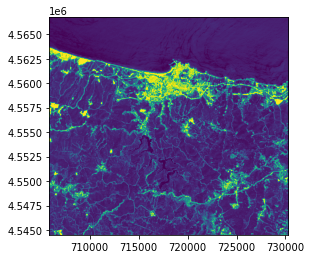

C:\Users\PC\anaconda3\envs\GEO468\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


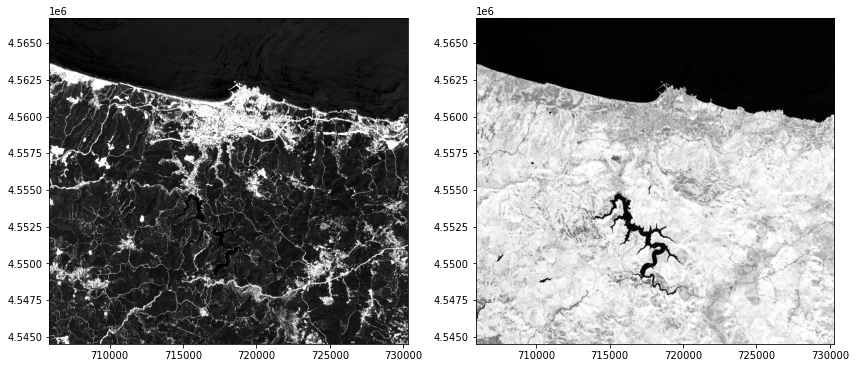

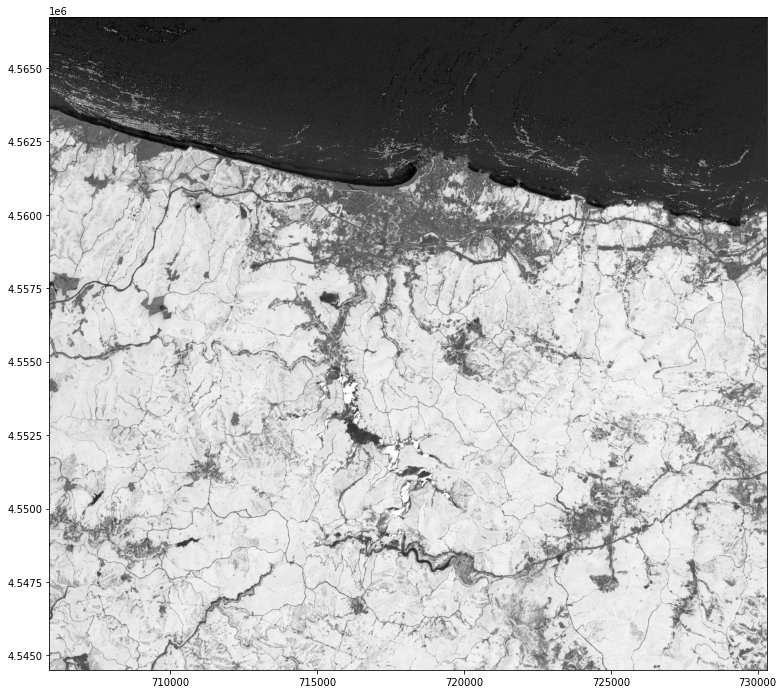

<AxesSubplot:>

In [35]:
#number of raster rows
band184.height
#number of raster columns
band184.width
#plot band 
plot.show(band184)
#type of raster byte
band184.dtypes[0]
#raster sytem of reference
band184.crs
#raster transform parameters
band184.transform
#raster values as matrix array
band184.read(1)
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band184, ax=ax1, cmap='Greys_r') #red
plot.show(band188, ax=ax2, cmap='Greys_r') #nir
fig.tight_layout()
#generate nir and red objects as arrays in float64 format
red_18 = band184.read(1).astype('float64')
nir_18 = band188.read(1).astype('float64')

nir
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir_18+red_18)==0., 
    0, 
    (nir_18-red_18)/(nir_18+red_18))
ndvi[:5,:5]
#export ndvi image
ndvi18Image = rasterio.open('C:/Users/PC/olcay16/ndvi182Image.tiff','w',driver='Gtiff',
                          width=band184.width, 
                          height = band184.height, 
                          count=1, crs=band184.crs, 
                          transform=band184.transform, 
                          dtype='float64')
ndvi18Image.write(ndvi,1)
ndvi18Image.close()
#plot ndvi
ndvi = rasterio.open('C:/Users/PC/olcay16/ndvi182Image.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi, cmap='gray')

In [27]:
#import bands as separate 1 band raster
bandgreen = rasterio.open('subset_0_of_S2B_MSIL2A_20200628T084559_N0214_R107_T35TQF_20200628T114603_resampled_B3.tif') #green
bandnir = rasterio.open('subset_2_of_S2B_MSIL2A_20200628T084559_N0214_R107_T35TQF_20200628T114603_resampled_B8.tif') #nir

C:\Users\PC\anaconda3\envs\GEO468\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


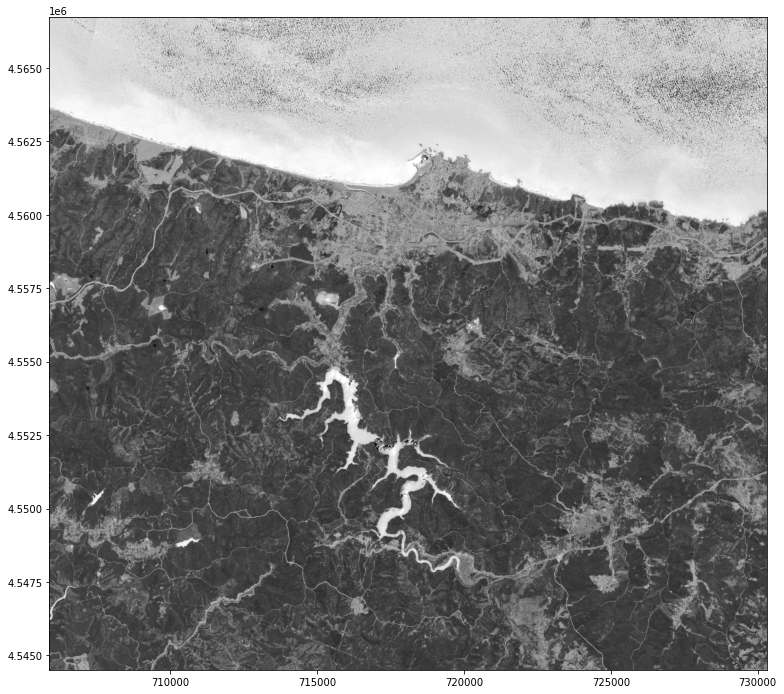

<AxesSubplot:>

In [36]:
#generate nir and green objects as arrays in float64 format
green = bandgreen.read(1).astype('float64')
nirband = bandnir.read(1).astype('float64')
#ndwi calculation, empty cells or nodata cells are reported as 0
ndwi=np.where(
    (nirband+green)==0., 
    0, 
    (green-nirband)/(nirband+green))
ndwi[:5,:5]
#export ndwi image
ndwiImage = rasterio.open('C:/Users/PC/olcay16/ndwiImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndwiImage.write(ndwi,1)
ndwiImage.close()
#plot ndwi
ndwi = rasterio.open('C:/Users/PC/olcay16/ndwiImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndwi, cmap='gray')